# Predicting house prices

Disclaimer:

This project follows work covered in the seccond chapter of 'Hands-On Machine Learning with Scikit-Learn, Keras &  TensorFlow.
Concepts, tools and Techniques to Build Intelligent Systems' - O'REILLY 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# numpy is going to be used for randomly permuting our data to generate a test set/train set.
# pandas is going to be used to generate our dataset 
# matplotlib going to be used for plotting our data

In [2]:
%matplotlib inline

# Downloading data

In [3]:
import os 
import tarfile
import urllib

#os lets you interact with the opperating system
#tarfile lets you read and write tar archieves
#urllib.request lets you open URLs
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets","housing")
HOUSING_URL = DOWNLOAD_ROOT +"datasets/housing/housing.tgz"

In [4]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    # housing_URL is a string and housing_path is....
    os.makedirs(housing_path, exist_ok=True)
    tgz_path=os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url,tgz_path)
    houzing_tgz = tarfile.open(tgz_path)
    houzing_tgz.extractall(path=housing_path)
    houzing_tgz.close()

In [5]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path=os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

In [6]:
fetch_housing_data()
housing=load_housing_data()

# Exploritary Analysis 

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


We can see missing data in the total_bedrooms column and the data types of each column. We have one categorical column and 9 numerical columns.

In [8]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


the .describe method allows us a nice snapshot of some standard statistical measures of each column

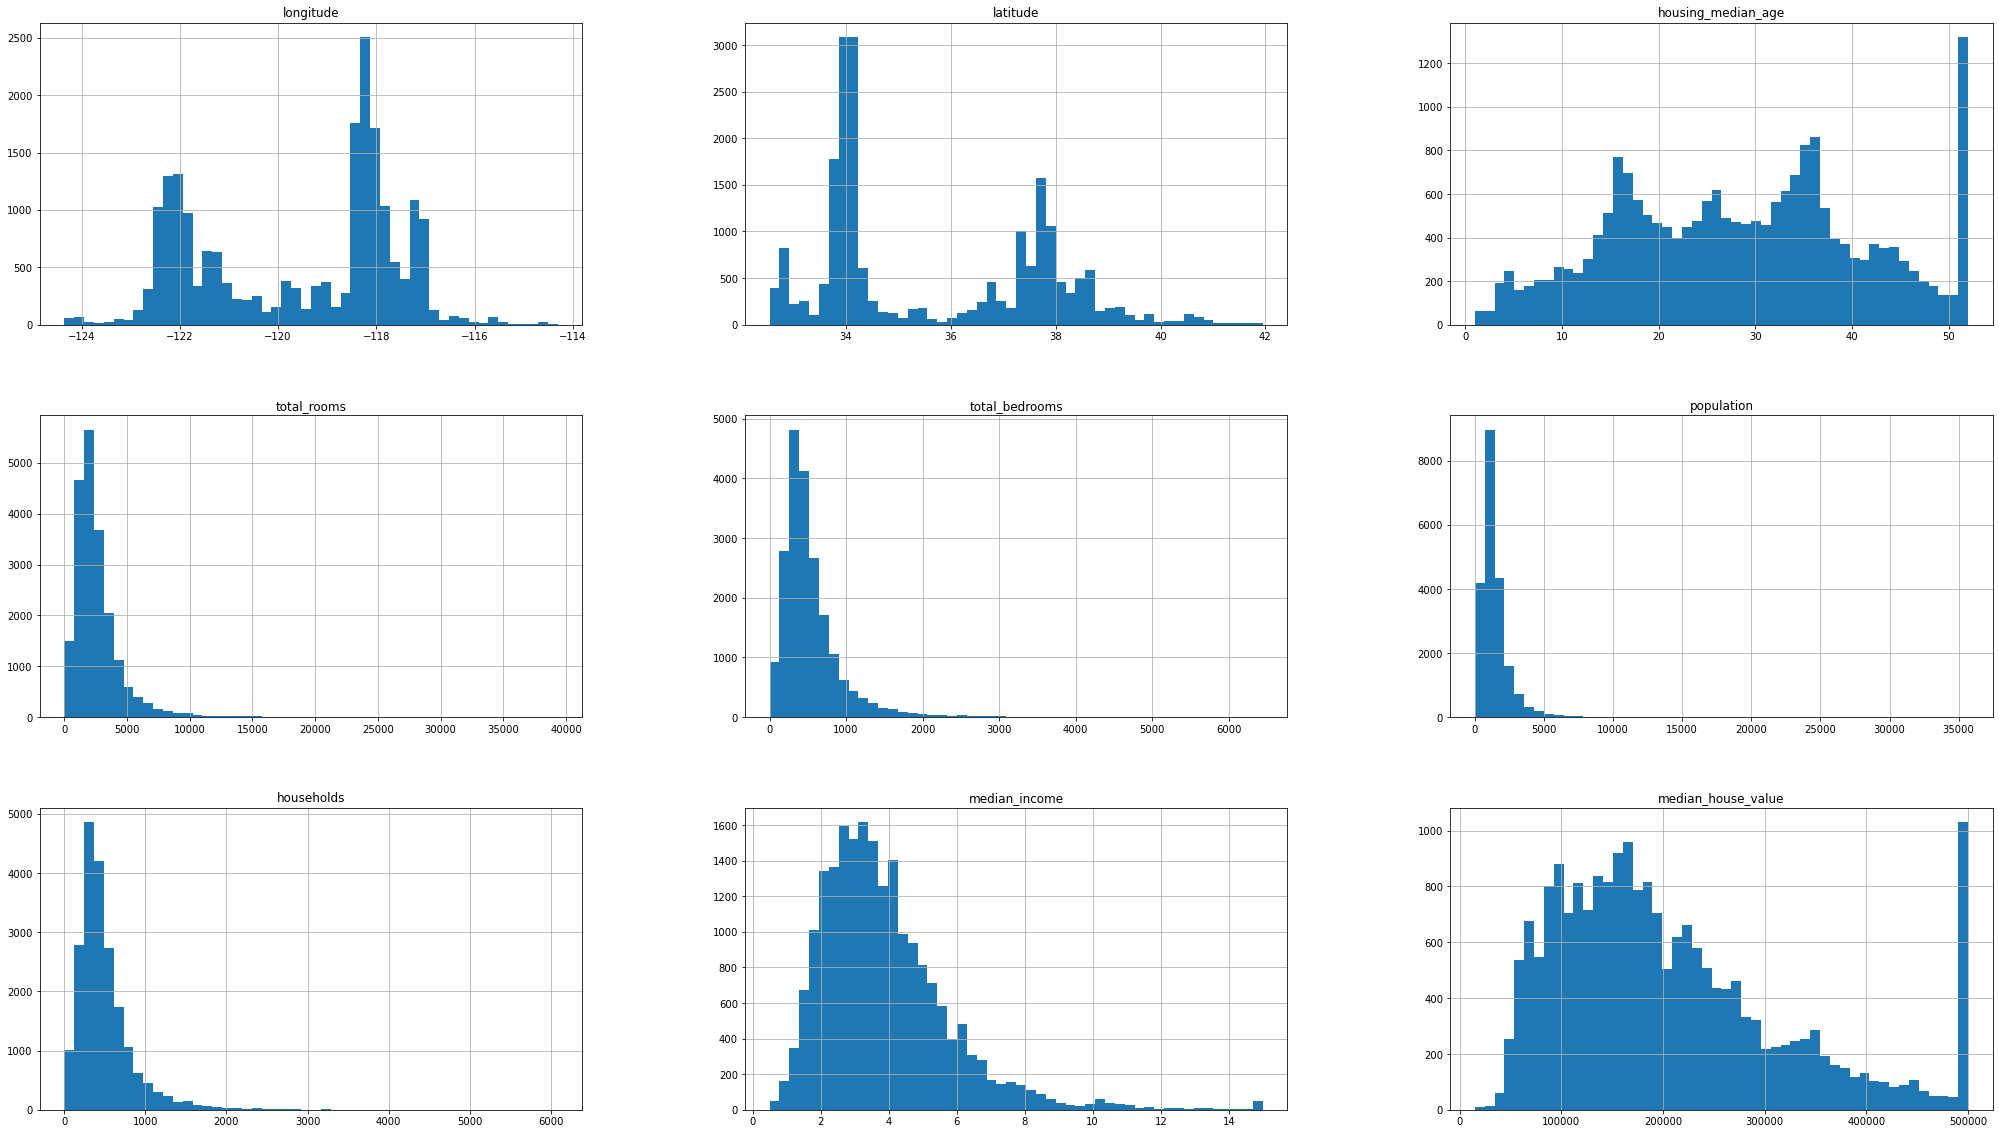

In [11]:
housing.hist(bins=50, figsize=(35,20))
plt.show()

By plotting histograms of our categories we can see if they are bell shaped (none), bimodal (latitude, longitude) or skewed left(population, total_bedrooms, total rooms, households, median income, median house value.)

We can also see oddities such as the large numbers of housing_median_age, median_house_value which are at or above their maximum values.

To zoom in on these plots you can doubble click.

# Splitting data

The following section will discuss a variety of ways to seperate out the test and training data.
This process is essential to evaluate our model and asses if it is overfitting.

our first function is ineffective when recieving new data and wanting to update the test set. It also generates a new test set each time it runs.

In [12]:
def split_train_test(data, test_ratio):
    # Data is a dataset. The test ratio is the ratio of that dataset used for testing rather than training.
    shuffled_indicies = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indicies = shuffled_indicies[:test_set_size]
    train_indicies = shuffled_indicies[test_set_size:]
    
    return data.iloc[train_indicies], data.iloc[test_indicies]

In [13]:
train_set, test_set = split_train_test(housing, 0.2)

An alternitive could be to compute a hash of the instances identifier and then adding the instance if the hash is within a threshold. This wouldn't break when recieving a new dataset.

crc32 is a "cyclic redunancy check" which generates a unique code for each identifier

The tilde is a bitwise negation operator, it returns the compliment binary number (e.g. ~101 =010) and can only be unsed in this way because in_test_set will be binary.

the section of the code after the two functions adds a unique identifier column and passes out housing data with that column through our split.


In [14]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32
#np.int64 changes the type of identifier to a 64 bit integer
#the threshold used is the largest 32 bit number * the test_ratio
# & 0xffffffff ensures conmatibility with python 2 and 3

def split_train_test_by_id(data,test_ratio,id_column):
    #.apply applies a function to all valuse of a pandas dataframe.
    # so this function returns the data not in the test set, the data in the test ste.
    ids=data[id_column]
    in_test_set=ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]


housing_with_id=housing.reset_index()
train_set,test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

you can combine unique features of your dataset such as the latitude and longitude in our case to create an index column. E.G.

In [15]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing ["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, .2, 'id')

Sci Kit learn has a module which covers this splitting process.

In [16]:
from sklearn.model_selection import train_test_split

train_set, test_set= train_test_split(housing,test_size=.2, random_state=42)

Suppose you want to take a stratified sample of the Median income. You can look at the medium income data and propose categories to seperate it in, and select a test set with the same ratio of quantities in each category .

(array([  34.,   64.,  137.,  260.,  400.,  659.,  693.,  896., 1044.,
        1023., 1144.,  957., 1296., 1076., 1038., 1071.,  865., 1025.,
         746.,  705.,  648.,  554.,  598.,  448.,  442.,  318.,  312.,
         318.,  220.,  220.,  176.,  122.,  117.,  100.,  105.,   98.,
          94.,   66.,   63.,   47.,   33.,   27.,   23.,   19.,   20.,
          16.,   48.,   31.,   21.,   27.,   23.,   13.,    8.,    9.,
           8.,    5.,    7.,    9.,    6.,    6.,    5.,    8.,    6.,
           3.,    3.,    0.,    2.,    3.,    0.,   52.]),
 array([ 0.4999    ,  0.70704571,  0.91419143,  1.12133714,  1.32848286,
         1.53562857,  1.74277429,  1.94992   ,  2.15706571,  2.36421143,
         2.57135714,  2.77850286,  2.98564857,  3.19279429,  3.39994   ,
         3.60708571,  3.81423143,  4.02137714,  4.22852286,  4.43566857,
         4.64281429,  4.84996   ,  5.05710571,  5.26425143,  5.47139714,
         5.67854286,  5.88568857,  6.09283429,  6.29998   ,  6.50712571,
      

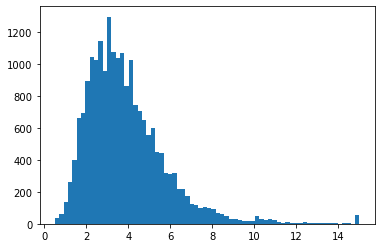

In [17]:
plt.hist(housing['median_income'],bins=70)
#the majority of the data is between 1 and 8

From our histagram we can see that the majority of data has a median income between 1 and 8 (The units of median income are unclear to me)

<AxesSubplot:>

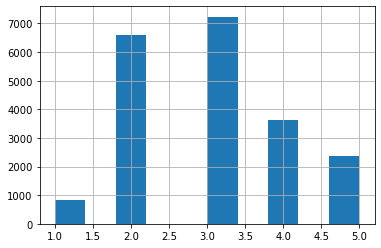

In [18]:
#splitting the data into categories using the .cut function
#np.inf represents infinity
#I am confused by the placement of the bars on the x axis, it doesn't change when the bins are adjusted,
#only when the labels are adjusted, but the bars don't match the columns in the x axis
housing['income_cat']=pd.cut(housing['median_income'], bins =[0.,1.5,3.0,4.5,6., np.inf],labels=[1,2,3,4,5])
housing['income_cat'].hist()

(array([  37.,  125.,  277.,  548.,  802., 1067., 1076., 1294., 1235.,
        1268., 1209., 1027., 1119.,  794.,  741.,  639.,  579.,  468.,
         327.,  387.,  245.,  216.,  134.,  118.,  124.,  109.,   83.,
          70.,   49.,   29.,   26.,   20.,   27.,   45.,   28.,   31.,
          23.,    8.,   13.,    7.,    8.,    8.,    6.,    7.,    9.,
           4.,    2.,    2.,    2.,   40.]),
 array([ 0.4999  ,  0.789904,  1.079908,  1.369912,  1.659916,  1.94992 ,
         2.239924,  2.529928,  2.819932,  3.109936,  3.39994 ,  3.689944,
         3.979948,  4.269952,  4.559956,  4.84996 ,  5.139964,  5.429968,
         5.719972,  6.009976,  6.29998 ,  6.589984,  6.879988,  7.169992,
         7.459996,  7.75    ,  8.040004,  8.330008,  8.620012,  8.910016,
         9.20002 ,  9.490024,  9.780028, 10.070032, 10.360036, 10.65004 ,
        10.940044, 11.230048, 11.520052, 11.810056, 12.10006 , 12.390064,
        12.680068, 12.970072, 13.260076, 13.55008 , 13.840084, 14.130088,
        

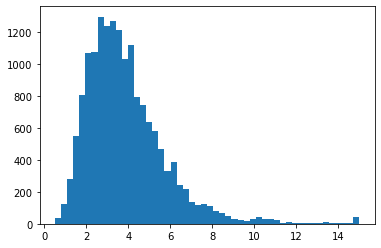

In [19]:
#I will now collect a stratified sample based on the income category
from sklearn.model_selection import StratifiedShuffleSplit

#I do not how split works and why we use split.split
#I thin it is because stratified shuffle split is a class and IDK how class wortks in python
#understand this before posting anywhere Ben!!!!!
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    
plt.hist(strat_train_set['median_income'], bins =50)    

(array([4.000e+01, 1.310e+02, 2.820e+02, 5.280e+02, 8.020e+02, 1.090e+03,
        1.073e+03, 1.267e+03, 1.212e+03, 1.286e+03, 1.195e+03, 1.007e+03,
        1.124e+03, 7.850e+02, 7.440e+02, 6.650e+02, 5.820e+02, 4.660e+02,
        3.300e+02, 3.930e+02, 2.470e+02, 2.320e+02, 1.350e+02, 1.210e+02,
        1.240e+02, 1.110e+02, 8.200e+01, 7.500e+01, 5.100e+01, 3.100e+01,
        1.900e+01, 2.000e+01, 2.500e+01, 4.800e+01, 3.100e+01, 2.800e+01,
        1.900e+01, 8.000e+00, 1.100e+01, 4.000e+00, 6.000e+00, 9.000e+00,
        6.000e+00, 7.000e+00, 9.000e+00, 4.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 4.400e+01]),
 array([ 0.4999  ,  0.789904,  1.079908,  1.369912,  1.659916,  1.94992 ,
         2.239924,  2.529928,  2.819932,  3.109936,  3.39994 ,  3.689944,
         3.979948,  4.269952,  4.559956,  4.84996 ,  5.139964,  5.429968,
         5.719972,  6.009976,  6.29998 ,  6.589984,  6.879988,  7.169992,
         7.459996,  7.75    ,  8.040004,  8.330008,  8.620012,  8.910016,
      

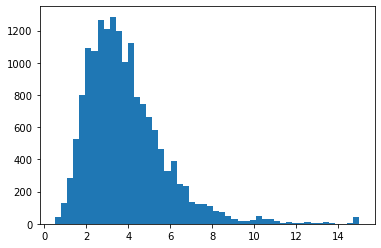

In [20]:
#I am not going to look at some of my test sets to compare my stratified and unstratified sets. 
#Because I may detect patterns in the test set and decide that it is not representitive of my data.
plt.hist(train_set['median_income'], bins =50)  

#I did this out or curiosity and the histograms appear very similar!

In [21]:
strat_train_set['income_cat'].value_counts()/len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [22]:
# a better way of comparing the stratified test set is to copare the proportion of the data in each category (above) to the 
#proportions in the main dataset (below), and the un-stratified test set (further below).
housing['income_cat'].value_counts()/len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [23]:
test_set['income_cat']=pd.cut(test_set['median_income'], bins =[0.,1.5,3.0,4.5,6., np.inf],labels=[1,2,3,4,5])
test_set['income_cat'].value_counts()/len(test_set)

<ipython-input-23-7f96142947f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['income_cat']=pd.cut(test_set['median_income'], bins =[0.,1.5,3.0,4.5,6., np.inf],labels=[1,2,3,4,5])


3    0.358527
2    0.324370
4    0.167393
5    0.109496
1    0.040213
Name: income_cat, dtype: float64

In [24]:
#removing the category column from the housing, test, training data.

test_set.drop("income_cat",axis=1, inplace=True)
strat_train_set.drop("income_cat",axis=1, inplace=True)

C:\Users\chapperz\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Visualization

In [25]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


<AxesSubplot:title={'center':'Districts by Median house Value'}, xlabel='longitude', ylabel='latitude'>

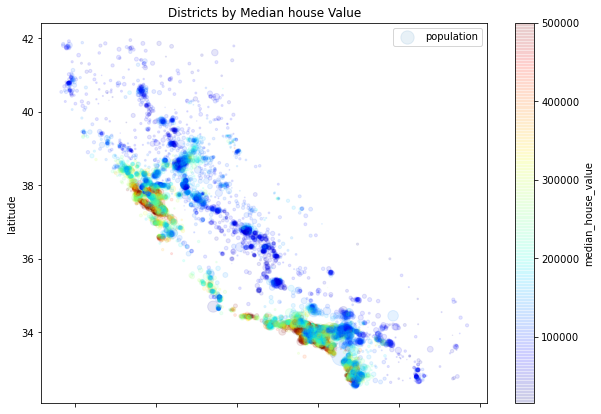

In [26]:
housing=strat_train_set.copy()
#This creates a scatter plot of the data with the size of each point proportional to the population of the district 
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=.1, s=housing['population']/100,label='population',
             c='median_house_value',cmap=plt.get_cmap("jet"), figsize=(10,7),title='Districts by Median house Value')

# Correlations

In [27]:
corr_matrix=housing.corr()
#I can look at the correlation of the median value of the house with all the other variables. note that the correlation 
#coefficient doesn't relate to the gradient of the correlation, but to the tightness of fir the data has to the imaginary line 
#of best fit
corr_matrix["median_house_value"].sort_values(ascending=False)
#we can see that the median income is the most corrilated variable with the variable we are trying to predict.

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

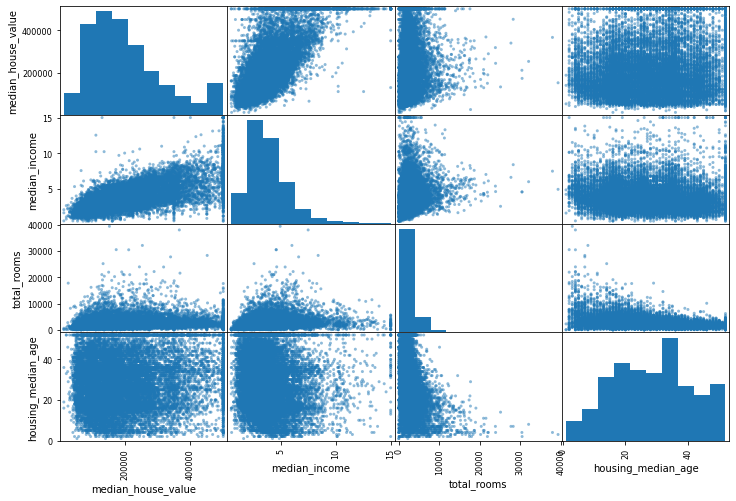

In [28]:
#let's have a look at the variables most associatedd witht he median housing value.
from pandas.plotting import scatter_matrix
attributes = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing[attributes], figsize=(12,8))

<AxesSubplot:xlabel='[median_income]', ylabel='[median_house_value]'>

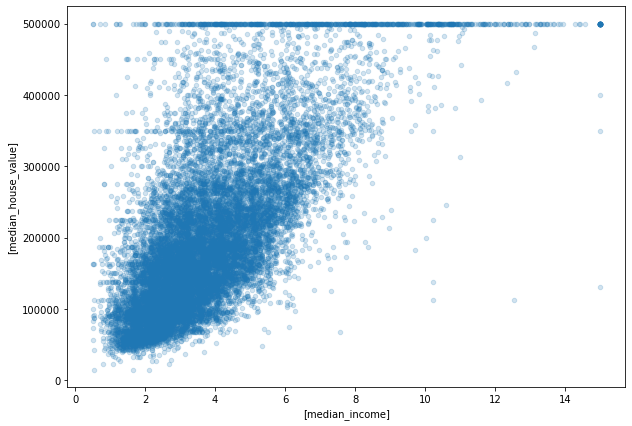

In [29]:
housing.plot(kind='scatter',figsize=(10,7),x=['median_income'],y=['median_house_value'], alpha=.2)

#clearly datapoints with a median house value over 500000 are able to show correlation in this plot correctly.
#this plot also shows us there are many points with the exact value around 4500000, 3500000, 2200000 abnd below (the horizontal 
#lines of data). This is likely to be a quirk of our data and removing them could imporove model performance, note the test set 
#is also likely to have this quirk as it has the same source.

In [30]:
#Experementing with attribute combinations.
#dinentionality reduction is important as having 5 variables describing similar things could be weighted disproportianally 
#combining them into one variable makes their weight on the model smaller. multi-collinearity 
#this can also reduce storage. when models reach 2 or 3 dimentions they become easy to visualise also.

housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

#now our corr_matrix looks like

corr_matrix=housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

#we can see that our new variables rooms_per_household and bedrooms per room were more correlated with our target variable 
#than either of the variables they are composed from - how neat!

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

# Data Cleaning

In [31]:
#now I will create a copy of our training set and beging cleaning it for use in our model.

housing=strat_train_set.drop('median_house_value',axis=1)
housing_labels=strat_train_set['median_house_value'].copy()
#I can see the total_bedrooms attribute is missing some values. (by using .info)
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


To remove the total_bedrooms entries with no data we could either

remove the district that each entry is in
#housing.dropna(subset=['total_bedrooms'])

remove the entire column axis 1 removes columns, axis 0 removes rows
#housing.drop("total_bedrooms",axis=1)

replace the missing values with some form of average (mean, mdeian etc)

#median=housing["total_bedrooms"].median()
#housing["total_bedrooms"].fillna(median,inplace=True)

If I used this 3rd option I would also use the calculated median when replacing na vlaues in the test set to evaluate the model.


In [32]:
#scikit learn has a function for this, called SimpleImputer It can either fill in missing values with the mean, mdeian, 
#mode or a constant. it also lets you put this new data in a copy of your original file.
#you use it by defining an imuter object and the calling it.fit(the data to imute) 
#the imputer object estimates the median for each missing value.

from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")

#this imputer will work on all the columns passed into it so I have to remove the only column which has a type not
#compatible with median
#this .fit moment is when our median calculations actually take place! 
#(A dataset without missing values has not yet been created)
housing_num=housing.drop("ocean_proximity",axis=1)
imputer.fit(housing_num)

#this imputer claculates the median for all of the missing values and stores them in the statistics_ vairable
#imputer.statistics_ <----look at it here
#it is the same as looking at the median of each variable in our housing_num dataset using the code below
housing_num.median().values

#_coef would show the coefficients of a linear regression.
# imputer.strategy lets us have a look at the models hyperperamaters.

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [33]:
#to transform our data set and replace missing data with the medians we've just calculated we can make an array with all 
#the correct info (called X in this case).
X = imputer.transform(housing_num)

#then we can create a dataframe object from the array X
housing_transformed = pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)
housing_transformed.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


# Dealing with Categorical Data

    Our ocean proximity column is a categorical attribute, many machiene learning algorithms can only interpret categorical attributes by converting the categorys into whole integers. I will use the SciKitLearn's OrdinalEncoder class to do this. 

In [34]:
housing_cat=housing[["ocean_proximity"]]
#if you only have one set of square brackets then you will return a pandas series (1d array with a name)
#if you have two square brackets you return a DataFrame (has the name as the first entry but has no name attribute)

In [35]:
#this time I will use the fit_transform which combines fit and transform into one function
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()
housing_cat_encoded=ordinal_encoder.fit_transform(housing_cat)
#housing_cat_encoded is now an array which has a load of 1 element lists with a number that relates to a category type.
#I can look at the categories by doing the below
ordinal_encoder.categories_


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

ML Algorithms might not work well with this type as they associate a distance between the categories, so using a one-hot encoding could be better.

this changes each category to be represented in a vector of all 0s and one 1 for the associated category of the entry

In [36]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

#a sparce row format saves memory by remembering the location of the 1 in each type rather than remembering all the 1s and 0s

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

# Custom Transformers

To make a custom transformer you create a class with three methods (functions within a class), fit(), transform() and fit_transform().

This has been my first introduction to python classes.

Our class will use the base classes BaseEstimator and TransformerMixin to use (get_params() -which returns a dictionary of the hyperamaters, set_params() -which can be used to set hyperperamaters during grid searches) and fit_transform() respectively.

Self is by convention the name of the first peramater in a class (the seccond is other).

The __init__ is short for initialization  self.add_bedrooms_per_room = add_bedrooms_per_room stores the value of add_bedrooms_per_room as a boolean attribute of self. this is where you would place any hyperperamaters you wich to use.

the fit function allows you to specify the data you will fit.

the transform function adds the new columns and returns a dataframe with the new columns and perhaps the bedrooms per room column.

np.c_ concatenates columns like below. We use it to combine our new columns with our dataframe

np.c_[np.array([1,2,3]), np.array([4,5,6])]
array([[1, 4],
       [2, 5],
       [3, 6]])
       
If you want an entry of a DataFrame you can call Dataframe_name[Row_no,Column_no] to find it. if you replace either no with :
then it will return all posibilities where the : is

In [37]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix= 3,4,5,6
#these should be the index numbers of the respective columns

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    """CombinedAttributesAdder is..."""
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self,X):
        """this makes tho new columns and if you set add_bedrooms_per_room==True also creates add_bedrooms_per_room."""
        rooms_per_household = X[:,rooms_ix]/X[:,households_ix]
        population_per_household = X[:,population_ix]/X[:,households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room ]
        else:
            return np.c_[X,rooms_per_household,population_per_household]

# Feature Scaling

Ml algorithms can perform better when the variables are all modified to a similar scale. I can describe Min-Max/normalization scaling and Standardization.

Normalization rescales all variables to be between 1 and 0. It is calculated by subtracting the min value of the respective attribute from each datapoint and then dividing it by the difference between the min and max vlues for that attribute.
scikitlearn has a transformer called min-max scaler for this.

Standardization does not bound its output in a range. It guarentees a mean of 0 by subtracting the mean from all values. It also has unit varianec as it divides the result of the last sentence by the standard deviation.
scikitlearn has a transformer called StandardScaler for this.

Standardization is better at dealing with outliers in our data as large outliers in the max-min scaling would shrink the values of all attributes significantly.


# Transformation Pipelines

SK Learn has a pipeline class which can be used to perform the transformations in sequence. It runs the arguments given in order, so I start by replacing null vlaues with the median, then I add the three extra columns, and then I standardize the data.

All of the methods in our pipeline must have a fit_transform() method other than the final one. in our case the Standard Scalar method is a transformer and has a fit_transform() method. This means we can call fit_transform() as a method of our pipeline.

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

The pipeline above only dealt with the numerical columns in our data. Here is a pipeline using the ColumnTransformer.

In [39]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs=['ocean_proximity']

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat",OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

In [40]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [64]:
print(housing_prepared[0])
print(some_data_prepared[0])

[-1.15604281  0.77194962  0.74333089 -0.49323393 -0.44543821 -0.63621141
 -0.42069842 -0.61493744 -0.31205452 -0.08649871  0.15531753  1.
  0.          0.          0.          0.        ]
[-1.10455841  1.00533684  1.47196014 -0.46113268 -0.4331532  -0.58007617
 -0.43824234 -0.43110712 -0.46223461 -0.92151953  0.42880968  1.
  0.          0.        ]


lets see how this regression works when we apply some of our data to it.

In [44]:
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]
some_data_prepared = full_pipeline.fit_transform(some_data)
print('predictions: ',lin_reg.predict(some_data_prepared) )
print('labels: ', list(some_labels)) 
#our prepared data now has 14 columns but usually It had 16 before.
#I am going to try and do it differently by following the num-categorical split as above!
#print(lin_reg.predict(some_data_prepared))

predictions:  [210644.60459286 317768.80697211 210956.43331178 ...  95464.57062437
 214353.22541713 276426.4692067 ]
labels:  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [56]:
#lin_reg.predict(some_data_prepared)

In [57]:
print(some_data_prepared)

print('came from:')


print(some_data.info())


print('compared to this data put through the same pipeline')

print(housing.info())

[[-1.10455841  1.00533684  1.47196014 -0.46113268 -0.4331532  -0.58007617
  -0.43824234 -0.43110712 -0.46223461 -0.92151953  0.42880968  1.
   0.          0.        ]
 [-1.12615291  0.86824545 -1.24550474 -0.88833875 -0.92454549 -0.85125272
  -0.91670982  1.93576051  1.7120418  -0.1229502  -1.78149012  1.
   0.          0.        ]
 [ 1.42739611 -1.57655096  0.67936622 -0.27660272 -0.19049034 -0.4283784
  -0.17783747 -0.33056682 -1.09128343 -1.01057078  1.02369397  0.
   0.          1.        ]
 [ 0.1263278   0.44554701  0.         -0.32706013 -0.39270939 -0.07665436
  -0.40860276 -0.95342003  0.49160921  1.73562899 -0.35529028  0.
   1.          0.        ]
 [ 0.67698742 -0.74257835 -0.90582163  1.95313428  1.94089843  1.93636166
   1.94139238 -0.22066654 -0.65013297  0.31941151  0.68427675  1.
   0.          0.        ]]
came from:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 17606 to 3555
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 

In [60]:
print(housing_num.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB
None
